In [ ]:
import numpy as np
import webcolors
import colour

# Define main color families (RGB 0–255)
named_colors = {
    "Red": (255, 0, 0),
    "Orange": (255, 165, 0),
    "Yellow": (255, 255, 0),
    "Green": (0, 128, 0),
    "Cyan": (0, 255, 255),
    "Blue": (0, 0, 255),
    "Purple": (128, 0, 128),
    "White": (255, 255, 255),
    "Black": (0, 0, 0)
}

rgb_values = np.array([np.array(v) / 255.0 for v in named_colors.values()])
color_names = list(named_colors.keys())

print("RGB array shape:", rgb_values.shape)


RGB array shape: (9, 3)


In [ ]:
hsv_values = np.array([colour.RGB_to_HSV(rgb) for rgb in rgb_values])
print("HSV array shape:", hsv_values.shape)


HSV array shape: (9, 3)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(hsv_values)

print("Cluster centers (HSV):")
print(kmeans.cluster_centers_)


Cluster centers (HSV):
[[0.33333333 1.         0.50196078]
 [0.         0.         0.        ]
 [0.10784314 1.         1.        ]
 [0.         0.         1.        ]
 [0.5        1.         1.        ]
 [0.83333333 1.         0.50196078]
 [0.66666667 1.         1.        ]
 [0.         1.         1.        ]
 [0.16666667 1.         1.        ]]


In [ ]:
def classify_color(rgb_pixel):
    rgb_normalized = np.array(rgb_pixel) / 255.0
    hsv_pixel = colour.RGB_to_HSV(rgb_normalized)
    cluster = kmeans.predict([hsv_pixel])[0]
    
    centroid = kmeans.cluster_centers_[cluster]
    distances = np.linalg.norm(hsv_values - centroid, axis=1)
    closest_color_idx = np.argmin(distances)
    return color_names[closest_color_idx]

print(classify_color((250, 100, 0))) 


Orange


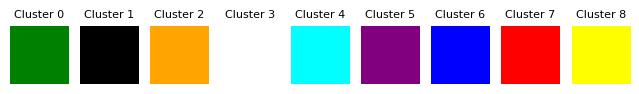

In [21]:
import matplotlib.pyplot as plt

centroids_rgb = np.array([colour.HSV_to_RGB(hsv) for hsv in kmeans.cluster_centers_])

plt.figure(figsize=(8, 2))
for i, color in enumerate(centroids_rgb):
    plt.subplot(1, 9, i+1)
    plt.imshow(np.ones((50, 50, 3)) * color)
    plt.title(f"Cluster {i}", fontsize=8)
    plt.axis("off")
plt.show()


🟢 Detected color families: {'Black', 'Purple', 'White', 'Orange'}


C:\Users\HOSHIYOMI_iroha\AppData\Local\Temp\ipykernel_23344\3260960645.py:71: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HOSHIYOMI_iroha\AppData\Local\Temp\ipykernel_23344\3260960645.py:71: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\xampp\htdocs\Evala\ReColor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\xampp\htdocs\Evala\ReColor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


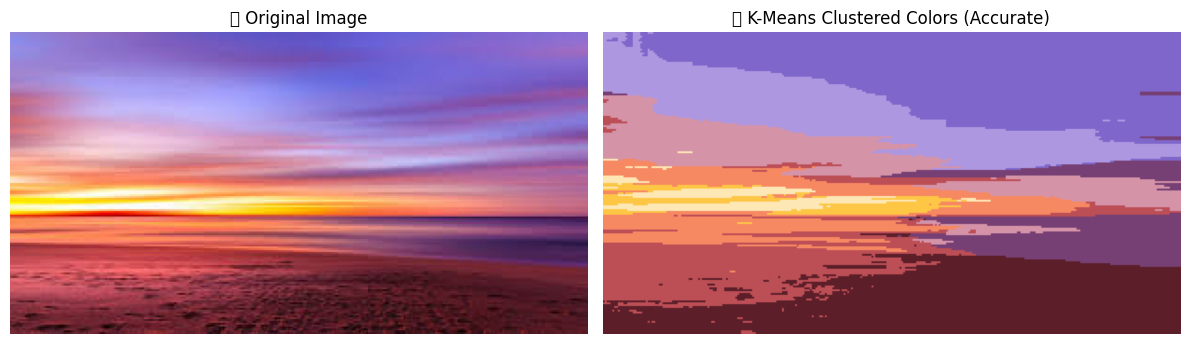

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import color as skcolor
from PIL import Image
import joblib

image_path = "C:\\xampp\\htdocs\\Evala\\ReColor\\test1.jpg"  
image = Image.open(image_path).convert("RGB")
image_np = np.array(image) / 255.0  

lab_img = skcolor.rgb2lab(image_np)
pixels = lab_img.reshape(-1, 3)

k = 9  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels)
centroids = kmeans.cluster_centers_

joblib.dump(kmeans, "kmeans_lab_model.pkl")

recolored_lab = centroids[labels].reshape(lab_img.shape)

recolored_rgb = skcolor.lab2rgb(recolored_lab)

named_colors = {
    "Red": (255, 0, 0),
    "Orange": (255, 165, 0),
    "Yellow": (255, 255, 0),
    "Green": (0, 128, 0),
    "Cyan": (0, 255, 255),
    "Blue": (0, 0, 255),
    "Purple": (128, 0, 128),
    "White": (255, 255, 255),
    "Black": (0, 0, 0)
}
lab_values = np.array([
    skcolor.rgb2lab(np.array([[np.array(v) / 255.0]]))[0, 0]
    for v in named_colors.values()
])
color_names = list(named_colors.keys())

def closest_named_color(lab_color):
    distances = np.linalg.norm(lab_values - lab_color, axis=1)
    return color_names[np.argmin(distances)]

cluster_labels = [closest_named_color(c) for c in centroids]

print("🟢 Detected color families:", set(cluster_labels))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_np)
ax[0].set_title("🎨 Original Image")
ax[0].axis("off")

ax[1].imshow(recolored_rgb)
ax[1].set_title("🎯 K-Means Clustered Colors (Accurate)")
ax[1].axis("off")

plt.tight_layout()
plt.show()


🎯 Detected color families: {'lightsteelblue', 'rebeccapurple', 'rosybrown', 'slateblue', 'maroon', 'moccasin', 'salmon', 'sandybrown', 'indianred'}


C:\Users\HOSHIYOMI_iroha\AppData\Local\Temp\ipykernel_23344\3797218826.py:47: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HOSHIYOMI_iroha\AppData\Local\Temp\ipykernel_23344\3797218826.py:47: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\xampp\htdocs\Evala\ReColor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\xampp\htdocs\Evala\ReColor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


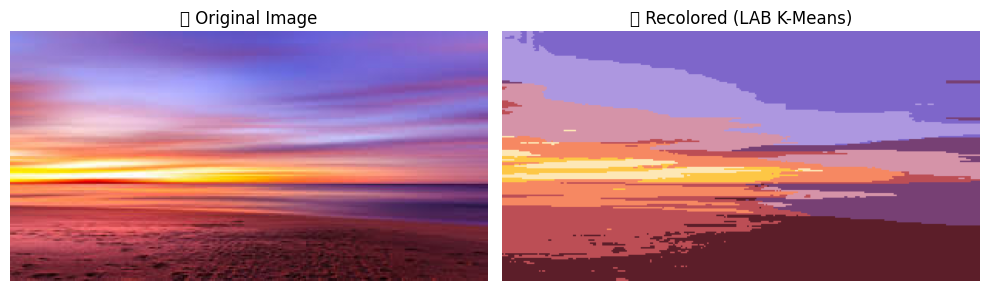

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io, color
import webcolors
from matplotlib.colors import CSS4_COLORS  

img = io.imread("C:\\xampp\\htdocs\\Evala\\ReColor\\test1.jpg") / 255.0 
pixels = img.reshape(-1, 3)

pixels_lab = color.rgb2lab(pixels.reshape(-1, 1, 3)).reshape(-1, 3)

kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(pixels_lab)
centroids_lab = kmeans.cluster_centers_

centroids_rgb = color.lab2rgb(centroids_lab.reshape(-1, 1, 3)).reshape(-1, 3)
recolored_img = centroids_rgb[labels].reshape(img.shape)

def closest_color(requested_color):
    min_dist = float("inf")
    closest_name = None
    for name, hex_code in CSS4_COLORS.items():  
        rgb = np.array(webcolors.hex_to_rgb(hex_code)) / 255.0
        dist = np.linalg.norm(rgb - requested_color)
        if dist < min_dist:
            min_dist, closest_name = dist, name
    return closest_name

color_names = [closest_color(c) for c in centroids_rgb]

print("🎯 Detected color families:", set(color_names))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title("🎨 Original Image")
axes[1].imshow(recolored_img)
axes[1].set_title("🎯 Recolored (LAB K-Means)")
for ax in axes: ax.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import joblib

centroids = np.array([
    [255, 0, 0],      # Red
    [255, 165, 0],    # Orange
    [255, 255, 0],    # Yellow
    [0, 255, 0],      # Green
    [0, 255, 255],    # Cyan
    [0, 0, 255],      # Blue
    [128, 0, 128],    # Purple
    [255, 255, 255],  # White
    [0, 0, 0]         # Black
])

kmeans = KMeans(n_clusters=9, init=centroids, n_init=1)
joblib.dump(kmeans, "kmeans_colors.pkl")


['kmeans_colors.pkl']

In [ ]:
import cv2
import numpy as np
import joblib
from collections import Counter

kmeans = joblib.load("kmeans_colors.pkl")

COLOR_NAMES = ["Red", "Orange", "Yellow", "Green", "Cyan", "Blue", "Purple", "White", "Black"]

cap = cv2.VideoCapture(0)
print("🎥 Press 'q' to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    small_frame = cv2.resize(frame, (100, 100))
    pixels = small_frame.reshape(-1, 3)

    labels = kmeans.predict(pixels)

    counts = Counter(labels)
    dominant_cluster = counts.most_common(1)[0][0]

    dominant_rgb = np.round(kmeans.cluster_centers_[dominant_cluster]).astype(int)
    color_name = COLOR_NAMES[dominant_cluster]

    color_box = np.zeros((100, 300, 3), dtype=np.uint8)
    color_box[:] = dominant_rgb[::-1] 

    cv2.putText(color_box, color_name, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 3)
    cv2.imshow("Camera Feed", frame)
    cv2.imshow("Detected Color", color_box)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


🎥 Press 'q' to quit


NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.